## Please, fill in before you start:

First Name: Anna

Last Name: Makarova

Group: MKH201 Cognitive sciences and technologies

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [SiLiKhon](https://github.com/SiLiKhon), [dMeVdok](https://github.com/dmevdok), [oleges1](https://github.com/oleges1) and [rogachevai](https://github.com/rogachevai) [as collaborators](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

Get the Titanic dataset:

In [1]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2021/main/01-intro/train.csv

--2021-09-26 17:00:29--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2021/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.001s  

2021-09-26 17:00:29 (61.0 MB/s) - ‘train.csv’ saved [60302/60302]



In [2]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [13]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

# compute survival rate for each class
first_class_survival_rate = len(data.loc[(data['Pclass'] == 1) & (data['Survived'] == 1)])/len(data.loc[(data['Pclass'] == 1)])
second_class_survival_rate = len(data.loc[(data['Pclass'] == 2) & (data['Survived'] == 1)])/len(data.loc[(data['Pclass'] == 2)])
third_class_survival_rate = len(data.loc[(data['Pclass'] == 3) & (data['Survived'] == 1)])/len(data.loc[(data['Pclass'] == 3)])
print(first_class_survival_rate)
print(second_class_survival_rate)
print(third_class_survival_rate)

first_class = data.groupby(['Survived','Pclass'])


In [54]:
data.groupby(['Survived','Pclass']).size()


Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

## Task 2 (1 point)

[0.18585526315789475, 0.6555023923444976, 0.6428571428571429, 1.3125, 1.5, 2.0, nan, nan, 2.0]


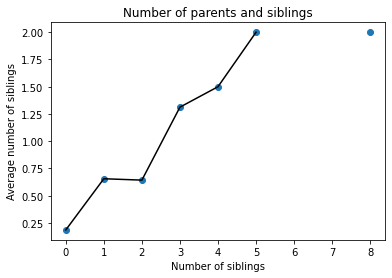

In [84]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt

# calculate average number of parents onboard
avrg_num_parents = []
for number_of_sib in range(data['SibSp'].max()+1):
  avrg_num_parents.append(data.loc[(data['SibSp'] == number_of_sib)]['Parch'].mean())
print(avrg_num_parents)

# plot the function
import numpy as np
x = np.arange(data['SibSp'].max()+1)

plt.scatter(x, avrg_num_parents)
plt.plot(x, avrg_num_parents, c = 'black')

plt.title('Number of parents and siblings')
plt.xlabel('Number of siblings')
plt.ylabel('Average number of siblings');

## Task 3 (2 points)

In [183]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
  dataset['Sex'] = np.where(dataset['Sex'] == 'male', 0, dataset['Sex'])
  dataset['Sex'] = np.where(dataset['Sex'] == 'female', 1, dataset['Sex'])

  dataset['Age'] = dataset['Age'].fillna(value=dataset['Age'].mean())
  features = dataset[['Sex', 'Age']].copy()

  return features
  # E.g.:
# features = dataset[["Fare", "Parch"]].copy()
# features["Fare"] /= features["Fare"].mean()
# features['Fare'] *= 1
# return features

model = KNeighborsClassifier(
    n_neighbors=7
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.78


## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_train)